In [ ]:
#!pip install ipywidgets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#!pip install pyreadstat

In [3]:
# read from SPSS file
spss_df = pd.read_spss('P15644_20220301.sav')
spss_df.head(5)

,panelid_2,Panel_PSU,Panel_Strata,Jun21_WeightBoost,Jun21_IntDate,Jun21_IntMode,ff_disact,Cur_GOR,cur_urbrurew,cur_urbrurs,...,FoodShopModePreCov,FoodTimePreCov,EconAct,WorkTime,WFH,CommuteMode,CommuteTime,FoodShopMode,FoodTime,Health
0,109050.0,11801864.0,9.0,1.210115,1.384271e+10,Web,No,South West,Urban,NaN,...,Driving a car or van,15.0,In full-time education (including on vacation),NaN,NaN,Studied from home,NaN,On foot,20.0,Very good
1,118890.0,11802264.0,11.0,0.904141,1.384272e+10,Web,Yes - does not affect day-to-day life,Scotland,NaN,Rural,...,"Bus, minibus, or coach",40.0,In paid work (or away temporarily) for at leas...,37.0,Worked entirely at home,NaN,NaN,"Bus, minibus, or coach",40.0,Bad
2,107526.0,11801455.0,2.0,0.385493,1.384308e+10,Web,No,North West,Urban,NaN,...,On foot,35.0,Wholly retired from work,NaN,NaN,NaN,NaN,On foot,35.0,Very good
3,114038.0,11900960.0,8.0,0.316471,1.384376e+10,Phone,No,South East,Rural,NaN,...,Driving a car or van,30.0,In paid work (or away temporarily) for at leas...,NaN,Worked equally at home and outside home,On foot,15.0,Driving a car or van,30.0,Very good
4,112090.0,11900561.0,9.0,0.273876,1.384309e+10,Web,No,South West,Rural,NaN,...,NaN,NaN,Doing something else,NaN,NaN,NaN,NaN,Driving a car or van,25.0,Good


In [4]:
import pandas as pd

raw_df = pd.read_csv('P15644.csv')

# set display full table
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1]:
import ipywidgets as widgets
from IPython.display import display


def run_code_block_1():
    global ori_df, raw_df

    ori_df = raw_df.copy()
    sex = 2 # 1-Male, 2-Female
    
    ori_df = ori_df[ori_df['Cur_Sex']==sex] 
    print('Select sex type',sex)
    # ori_df = ori_df[ori_df['Cur_Sex']==2]

def run_code_block_2():
    global ori_df, raw_df
    
    ori_df = raw_df.copy()
    age_cat_list = [3,4,5,6] # 1:18-29, 2:30-39, 3:40-49, 4:50-59, 5:60-69, 6:70+
    ori_df = ori_df[ori_df['Cur_AgeCat'].isin(age_cat_list)] 
    print('Select age range',age_cat_list)
    
def run_code_block_3():
    global ori_df, raw_df
    
    ori_df = raw_df.copy()
    income_list = [1,2,3] # 1:0-1000, 2:1001-1500, 3:1501-2500, 4:2500+ (monthly)
    ori_df = ori_df[ori_df['Cur_HHIncomeEquiv4_21_Imputed'].isin(income_list)] 
    print('Select income',income_list)
    
def run_code_block_4():
    global ori_df, raw_df
    ori_df = raw_df.copy()
    print('Reset/All categories and values')

# Creating Buttons
button1 = widgets.Button(description="Select sex")
button2 = widgets.Button(description="Select age")
button3 = widgets.Button(description="Select income level")
button4 = widgets.Button(description="Reset/All categories and values")

# Define the button click event
def on_button1_clicked(b):
    run_code_block_1()

def on_button2_clicked(b):
    run_code_block_2()
    
def on_button3_clicked(b):
    run_code_block_3()
    
def on_button4_clicked(b):
    run_code_block_4()

# Bind click event to buttons
button1.on_click(on_button1_clicked)
button2.on_click(on_button2_clicked)
button3.on_click(on_button3_clicked)
button4.on_click(on_button4_clicked)

# Show Buttons
display(button1)
display(button2)
display(button3)
display(button4)

Button(description='Select sex', style=ButtonStyle())

Button(description='Select age', style=ButtonStyle())

Button(description='Select income level', style=ButtonStyle())

Button(description='Reset/All categories and values', style=ButtonStyle())

## 1. Data cleaning

#### Housing Cost to Income

In [8]:
global ori_df

# 98 rows have both mortcost and rentcost as null (差不多一半是全款买房，所以租金和房贷都是空值)ori_df
ori_df['MortCost']  =ori_df['MortCost'].fillna(0)
ori_df['RentCost']  =ori_df['RentCost'].fillna(0)
ori_df['HousingCost'] =ori_df['MortCost'] +ori_df['RentCost'] # 每个月的

In [9]:
# The income value is missing, and a total of 133 samples are removed
print(ori_df['Cur_HHIncomeEquiv4_21_Imputed'].isnull().sum())
ori_df = ori_df.dropna(subset=['Cur_HHIncomeEquiv4_21_Imputed'])

133


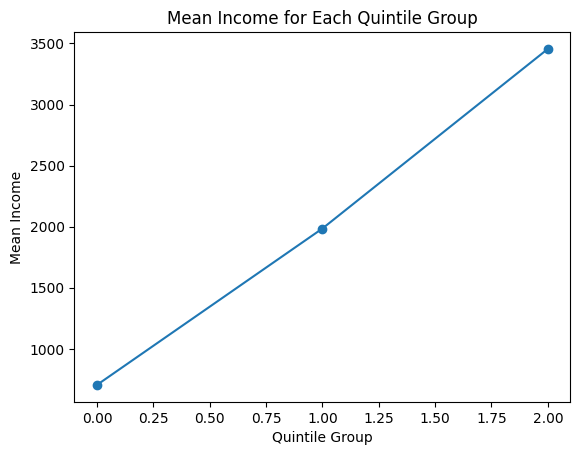

In [11]:
plt.plot([0,1,2], new_mean_group[:3], marker='o')
plt.xlabel('Quintile Group')
plt.ylabel('Mean Income')
plt.title('Mean Income for Each Quintile Group')
plt.show()


In [10]:
mean_group = [500, 1250, 2000, 3000]
new_mean_group = list(map(lambda x:((x[1]+x[0])/2), [[0,1410],[1410,2560],[2560, 4350]]))
new_mean_group.append(5115.0)
print(new_mean_group)

[705.0, 1985.0, 3455.0, 5115.0]


In [12]:
ori_df['Cur_HHIncome4_21_real_value'] =ori_df['Cur_HHIncome4_21_Imputed'].apply(lambda x: new_mean_group[int(x)-1])
ori_df['HousingCostToIncome'] = ori_df['HousingCost'] / ori_df['Cur_HHIncome4_21_real_value']

In [13]:
ori_df[ori_df['HousingCostToIncome'] > 1].head(5)

,panelid_2,Panel_PSU,Panel_Strata,Jun21_WeightBoost,Jun21_IntDate,Jun21_IntMode,ff_disact,Cur_GOR,cur_urbrurew,cur_urbrurs,Cur_Sex,Cur_RClassGp,Cur_AgeCat,Cur_HEdQual,Cur_RelStat5,Cur_HHSize5,Cur_HHChild,Cur_HHType,Cur_SubjInc,Cur_HHIncome4_21,Cur_HHIncome4_21_Imputed,Cur_HHIncomeEquiv4_21,Cur_HHIncomeEquiv4_21_Imputed,Cur_IdentClass,Cur_PartyID5,Cur_Ethnic6,Cur_IntUse3,Tenure,MortCost,RentCost,CvBedRoom,HomeProb01,HomeProb02,HomeProb03,HomeProb04,HomeProb05,HomeProb06,HomeProb07,HomeProb08,HomeProb09,HomeProb10,HomeProb11,HomeProb12,HomeProb13,HomeProb14,HomeProb15,HomeProb16,HomeProb17,HomeProb_Oth,NeighQual_CrimeSafety_q,NeighQual_TrafficSafety_q,NeighQual_FoodStores_q,NeighQual_AccessPubTrans_q,NeighQual_AccessSocCult_q,NeighQual_AccessRetail_q,NeighQual_AccessRec_q,NeighQual_EaseWalk_q,NeighQual_EaseCycle_q,NeighQual_OutdoorPlay_q,NeighQual_QualitySchools_q,NeighQual_NeighbourSoc_q,MovHom,EconActPreCov1,EconActPreCov2,EconActPreCov3,EconActPreCov4,EconActPreCov5,WorkTimePreCov,WFHPreCov,CommuteModePreCov,CommuteTimePreCov,FoodShopModePreCov,FoodTimePreCov,EconAct,WorkTime,WFH,CommuteMode,CommuteTime,FoodShopMode,FoodTime,Health,HousingCost,Cur_HHIncome4_21_real_value,HousingCostToIncome
17,112901.0,11800439.0,4.0,2.157926,1.384348e+10,Web,3.0,2.0,1.0,NaN,2.0,5.0,3.0,2.0,5.0,2.0,2.0,3.0,5.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,10.0,0.0,1000.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,5.0,5.0,5.0,2.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,60.0,5.0,1.0,90.0,9.0,90.0,3.0,37.0,5.0,9.0,30.0,9.0,90.0,4.0,1000.0,705.0,1.418440
23,103573.0,11502502.0,7.0,0.290508,1.384393e+10,Web,3.0,7.0,1.0,NaN,2.0,3.0,5.0,1.0,3.0,1.0,2.0,1.0,5.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,10.0,0.0,880.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,1.0,3.0,2.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,50.0,5.0,1.0,45.0,8.0,10.0,5.0,NaN,NaN,NaN,NaN,8.0,45.0,2.0,880.0,705.0,1.248227
24,101866.0,11800514.0,5.0,5.172297,1.384383e+10,Web,3.0,5.0,1.0,NaN,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,1.0,10.0,0.0,900.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,3.0,1.0,5.0,4.0,5.0,2.0,4.0,5.0,5.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,37.0,5.0,9.0,30.0,6.0,20.0,3.0,37.0,1.0,NaN,NaN,6.0,40.0,1.0,900.0,705.0,1.276596
26,119064.0,12001155.0,7.0,1.083894,1.384304e+10,Web,3.0,7.0,1.0,NaN,1.0,1.0,2.0,1.0,1.0,4.0,NaN,4.0,5.0,NaN,1.0,NaN,1.0,2.0,2.0,4.0,2.0,10.0,0.0,1300.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,3.0,2.0,4.0,5.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,3.0,30.0,5.0,NaN,NaN,NaN,NaN,3.0,35.0,3.0,1300.0,705.0,1.843972
28,112800.0,12000788.0,6.0,1.051764,1.384281e+10,Web,3.0,6.0,1.0,NaN,1.0,1.0,1.0,3.0,5.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,10.0,0.0,850.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,3.0,4.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,30.0,5.0,9.0,20.0,9.0,30.0,3.0,28.0,5.0,9.0,20.0,9.0,30.0,3.0,850.0,705.0,1.205674


#### Home Problem

In [14]:
# define 'HomeProbTotal' as the sum of 'HomeProb01' to 'HomeProb14'
ori_df['HomeProbTotal'] = ori_df.loc[:, 'HomeProb01':'HomeProb14'].sum(axis=1)

#### Neighbor Quality

In [15]:
# drop nan value (80 missing values)
ori_df = ori_df.dropna(subset=['NeighQual_CrimeSafety_q', 'NeighQual_TrafficSafety_q', 'NeighQual_FoodStores_q',
       'NeighQual_AccessPubTrans_q', 'NeighQual_AccessSocCult_q',
       'NeighQual_AccessRetail_q', 'NeighQual_AccessRec_q',
       'NeighQual_EaseWalk_q', 'NeighQual_EaseCycle_q',
       'NeighQual_OutdoorPlay_q', 'NeighQual_QualitySchools_q',
       'NeighQual_NeighbourSoc_q'])

print(ori_df.loc[:, 'NeighQual_CrimeSafety_q':'NeighQual_NeighbourSoc_q'].isnull().sum())

ori_df['NeighQualTotal'] = ori_df.loc[:, 'NeighQual_CrimeSafety_q':'NeighQual_NeighbourSoc_q'].sum(axis=1)

NeighQual_CrimeSafety_q       0
NeighQual_TrafficSafety_q     0
NeighQual_FoodStores_q        0
NeighQual_AccessPubTrans_q    0
NeighQual_AccessSocCult_q     0
NeighQual_AccessRetail_q      0
NeighQual_AccessRec_q         0
NeighQual_EaseWalk_q          0
NeighQual_EaseCycle_q         0
NeighQual_OutdoorPlay_q       0
NeighQual_QualitySchools_q    0
NeighQual_NeighbourSoc_q      0
dtype: int64


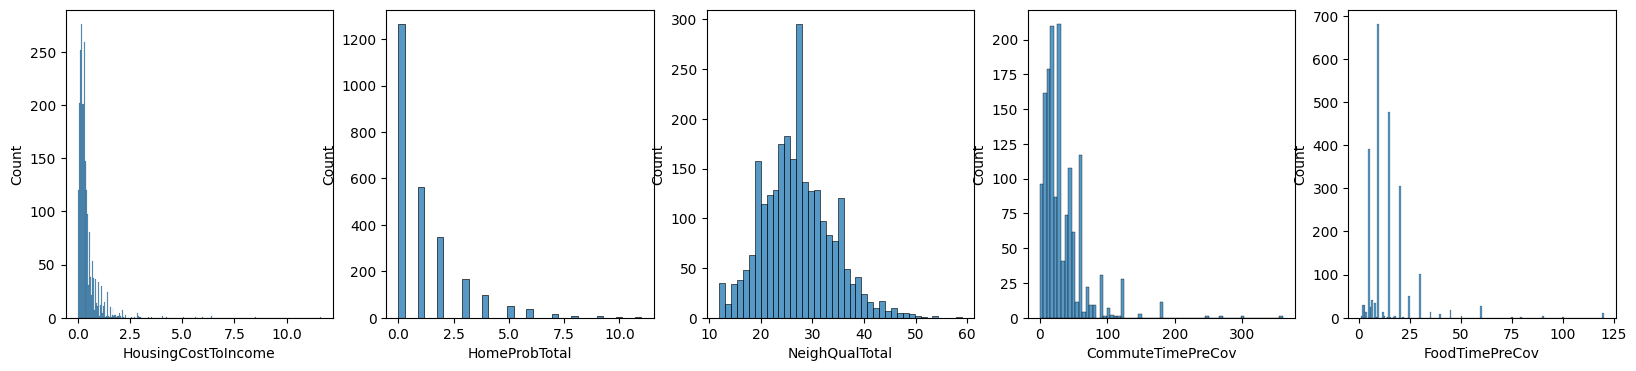

In [16]:
# plot for 'HousingCostToIncome'、'HomeProbTotal' 、 'NeighQualTotal' 、'TransportTime'
# plot in one figure 
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
sns.histplot(ori_df['HousingCostToIncome'], ax=axes[0])
sns.histplot(ori_df['HomeProbTotal'], ax=axes[1])
sns.histplot(ori_df['NeighQualTotal'], ax=axes[2])
sns.histplot(ori_df['CommuteTimePreCov'], ax=axes[3])
sns.histplot(ori_df['FoodTimePreCov'], ax=axes[4])

plt.show()


In [17]:
# HousingCostToIncome、NeighQualTotal、CommuteTimePreCov、FoodTimePreCov呈现出右偏态分布特点，数据主要集中于左侧，说明大部分人的房屋支出占收入比例、邻里质量、通勤时间、食物准备时间都比较低，剥夺程度低？
# HomeProbTotal呈现出长尾分布特点，说明大多数人住房问题并不严重


## 2. Variable transformation 

#### Housing Cost to Income

In [18]:
ori_df['HousingCostToIncomeGroup'] = pd.cut(ori_df['HousingCostToIncome'], bins=[-1, 0.3, 0.4, 0.5,100], labels=[0,1,2,3])
ori_df['HousingCostToIncomeGroup'] = ori_df['HousingCostToIncomeGroup'].astype(float)
print(ori_df['HousingCostToIncomeGroup'].value_counts())

HousingCostToIncomeGroup
0.0    1422
3.0     578
1.0     320
2.0     244
Name: count, dtype: int64


#### HomeProbTotal

In [19]:
# Calculate the counts & percentage of each unique value in 'HomeProbTotal'
home_prob_total_counts = ori_df['HomeProbTotal'].value_counts()
home_prob_total_percentage = ori_df['HomeProbTotal'].value_counts(normalize=True) * 100

home_prob_total_summary = pd.DataFrame({
    'Count': home_prob_total_counts,
    'Percentage': home_prob_total_percentage
})

print(home_prob_total_summary)

               Count  Percentage
HomeProbTotal                   
0.0             1264   49.297972
1.0              565   22.035881
2.0              346   13.494540
3.0              169    6.591264
4.0               99    3.861154
5.0               51    1.989080
6.0               36    1.404056
7.0               14    0.546022
8.0                9    0.351014
9.0                7    0.273011
10.0               2    0.078003
11.0               2    0.078003


In [20]:
# 按HomeProbTotal为0,1-2,3-5,大于6进行分组
ori_df['HomeProbTotalGroup'] = pd.cut(ori_df['HomeProbTotal'], bins=[-1, 0, 2, 5, 100], labels=[0, 1, 2, 3])
ori_df['HomeProbTotalGroup'] = ori_df['HomeProbTotalGroup'].astype(float)
print(ori_df['HomeProbTotalGroup'].value_counts())

HomeProbTotalGroup
0.0    1264
1.0     911
2.0     319
3.0      70
Name: count, dtype: int64


#### NeighQualTotal

In [21]:
# Calculate the counts & percentage of each unique value in 'NeighQualTotalTotal'
neigh_quali_total_counts = ori_df['NeighQualTotal'].value_counts()
neigh_quali_total_percentage = ori_df['NeighQualTotal'].value_counts(normalize=True) * 100

neigh_quali_total_summary = pd.DataFrame({
    'Count': neigh_quali_total_counts,
    'Percentage': neigh_quali_total_percentage
})

neigh_quali_total_summary = neigh_quali_total_summary.sort_index()
print(neigh_quali_total_summary)

                Count  Percentage
NeighQualTotal                   
12.0               20    0.780031
13.0               15    0.585023
14.0               14    0.546022
15.0               34    1.326053
16.0               38    1.482059
17.0               48    1.872075
18.0               63    2.457098
19.0               81    3.159126
20.0               77    3.003120
21.0              114    4.446178
22.0              123    4.797192
23.0              128    4.992200
24.0              175    6.825273
25.0              183    7.137285
26.0              160    6.240250
27.0              149    5.811232
28.0              146    5.694228
29.0              136    5.304212
30.0              127    4.953198
31.0              128    4.992200
32.0               97    3.783151
33.0               83    3.237129
34.0               77    3.003120
35.0               56    2.184087
36.0               64    2.496100
37.0               49    1.911076
38.0               34    1.326053
39.0          

In [22]:
ori_df['NeighQualTotalGroup'] = pd.cut(ori_df['NeighQualTotal'], bins=[-1,20,30,40,100], labels=[0,1,2,3])
ori_df['NeighQualTotalGroup'] = ori_df['NeighQualTotalGroup'].astype(float)
print(ori_df['NeighQualTotalGroup'].value_counts())

NeighQualTotalGroup
1.0    1441
2.0     653
0.0     390
3.0      80
Name: count, dtype: int64


#### Transport Time

In [4]:
import ipywidgets as widgets
from IPython.display import display


def run_code_block_1():
    global ori_df, df
    print('只用CommuteTime，且剔除空值')
    
    df = ori_df.copy()
    # Drop nan value for CommuteTimePreCov
    df = df.dropna(subset=['CommuteTimePreCov'])
    df['TransportTimeGroup'] = pd.cut(df['CommuteTimePreCov'], bins=[-1, 30, 40, 50, 500], labels=[0,1,2,3])
    df['TransportTimeGroup'] = df['TransportTimeGroup'].astype(float)
    print(df['TransportTimeGroup'].value_counts())

def run_code_block_2():
    global ori_df, df
    
    df = ori_df.copy()
    # Eliminate data where both CommuteTimePreCov and FoodTimePreCov are null values
    df = df.dropna(subset=['CommuteTimePreCov', 'FoodTimePreCov'], how='all')
    df['CommuteTimeGroup'] = pd.cut(df['CommuteTimePreCov'], bins=[-1, 30, 40, 50, 500], labels=[0,1,2,3])
    df['FoodTimeGroup'] = pd.cut(df['FoodTimePreCov'], bins=[-1, 5, 10, 15, 500], labels=[0,1,2,3])
    
    # If CommuteTimeGroup is empty, the value of FoodTimeGroup is used
    df['TransportTimeGroup'] = df['CommuteTimeGroup'].fillna(df['FoodTimeGroup'])
    df['TransportTimeGroup'] = df['TransportTimeGroup'].astype(float)
    print(df['TransportTimeGroup'].value_counts())

# Creating Buttons
button1 = widgets.Button(description="Commute")
button2 = widgets.Button(description="Commute & Food")

# Define the button click event
def on_button1_clicked(b):
    run_code_block_1()

def on_button2_clicked(b):
    run_code_block_2()

# Bind click event to buttons
button1.on_click(on_button1_clicked)
button2.on_click(on_button2_clicked)

# Show Buttons
display(button1)
display(button2)

Button(description='Commute', style=ButtonStyle())

Button(description='Commute & Food', style=ButtonStyle())

In [45]:
# HousingCostToIncomeGroup & TransportTimeGroup

df['Housing&TransportGroup'] = df['HousingCostToIncomeGroup'] + df['TransportTimeGroup']
print(df['Housing&TransportGroup'].value_counts())

Housing&TransportGroup
0.0    459
3.0    395
2.0    224
1.0    210
4.0     90
5.0     62
6.0     51
Name: count, dtype: int64


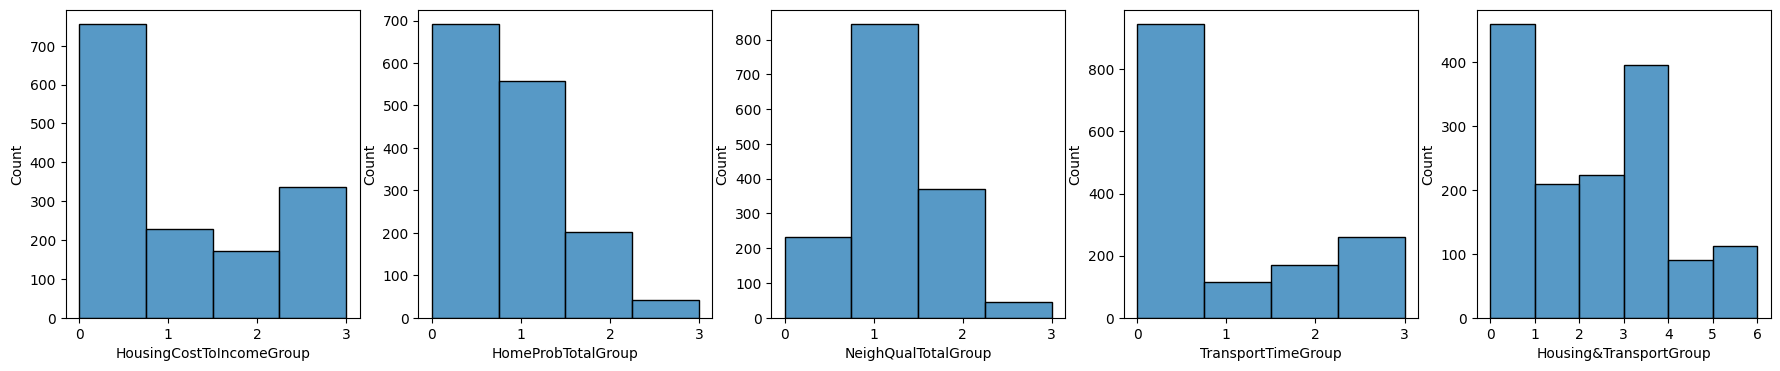

In [60]:
# plot for 'HousingCostToIncomeGroup'、'HomeProbTotalGroup' 、 'NeighQualTotalGroup' 、'TransportTimeGroup'
# plot in one figure
fig, axes = plt.subplots(1, 5, figsize=(22, 4))
sns.histplot(df['HousingCostToIncomeGroup'], ax=axes[0],bins=4)
axes[0].set_xticks(np.arange(0, 4, 1))
sns.histplot(df['HomeProbTotalGroup'], ax=axes[1],bins=4)
axes[1].set_xticks(np.arange(0, 4, 1))
sns.histplot(df['NeighQualTotalGroup'], ax=axes[2],bins=4)
axes[2].set_xticks(np.arange(0, 4, 1))
sns.histplot(df['TransportTimeGroup'], ax=axes[3],bins=4)
axes[3].set_xticks(np.arange(0, 4, 1))
sns.histplot(df['Housing&TransportGroup'], ax=axes[4], bins=6)
axes[4].set_xticks(np.arange(0, 7, 1))
plt.show()


In [61]:
# 除了NeighQualTotalGroup，其他三个维度中，第0组的样本数量总是最多的，说明该三个维度中，大多数人的剥夺程度都不高
# NeighQualTotalGroup中，第1组的样本数量最多，说明大多数人的邻里质量一般？

## 3.Descriptive statistics

<Axes: xlabel='TransportTimeGroup', ylabel='Health'>

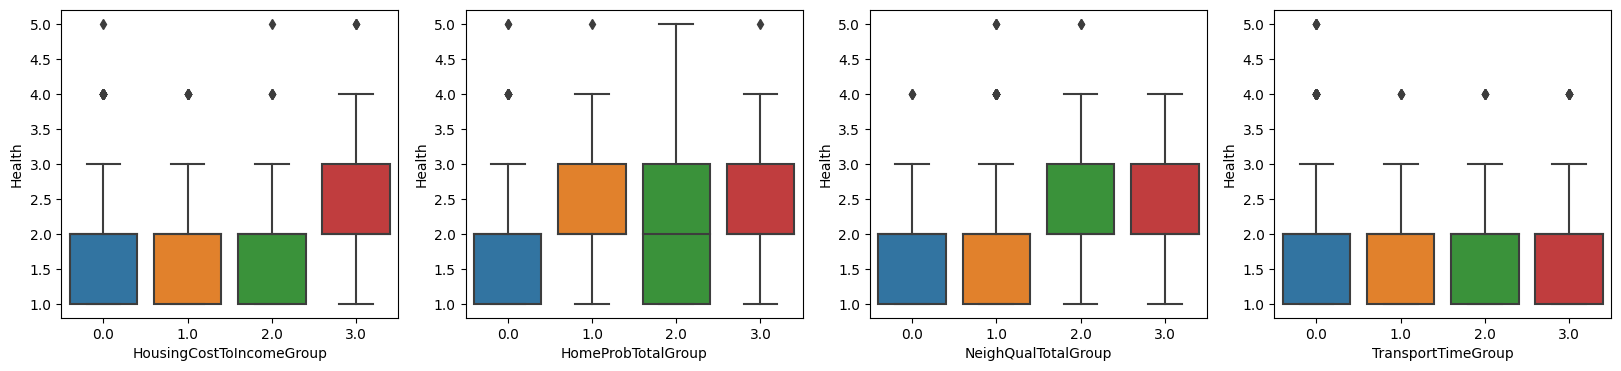

In [62]:
# plot boxplot for 'HousingCostToIncomeGroup'、'HomeProbTotalGroup' 、 'NeighQualTotalGroup' 、'TransportTimeGroup'
# plot in one figure
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
sns.boxplot(x='HousingCostToIncomeGroup', y='Health', data=df, ax=axes[0])
sns.boxplot(x='HomeProbTotalGroup', y='Health', data=df, ax=axes[1])
sns.boxplot(x='NeighQualTotalGroup', y='Health', data=df, ax=axes[2])
sns.boxplot(x='TransportTimeGroup', y='Health', data=df, ax=axes[3])

In [63]:
# TransportTimeGroup和Health之间的关系不明显，所有组的健康值中箱体的位置都差不多
# 其他三个维度中，剥夺程度越高，健康越差（虽然没有严格对应，但至少不同组的中位数、箱体和须是有差别的，剥夺程度越高，须包含健康值范围更高）


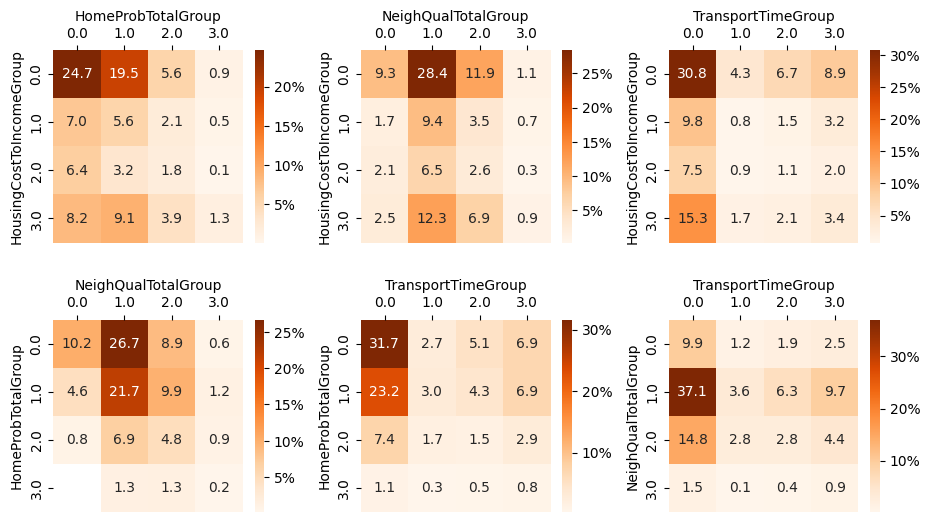

In [64]:
# plot heat map for 'HousingCostToIncomeGroup'、'HomeProbTotalGroup' 、 'NeighQualTotalGroup' 、'TransportTimeGroup'
# plot in one figure

# Heat map of sample size for different deprivation combinations
column_list = ['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']

fig, axes = plt.subplots(2, 3, figsize=(11, 6))
idx = 0
for i in range(4):
    for j in range(i+1, 4):
        pivot_table = df.pivot_table(index=column_list[i], columns=column_list[j], values='Health', aggfunc='count')
        percent_table = pivot_table / pivot_table.sum().sum() * 100
        sns.heatmap(percent_table, ax=axes[(idx)//3, (idx)%3], annot=True, fmt='.1f', cmap='Oranges',cbar_kws={'format': '%.0f%%'})
        axes[(idx)//3, (idx)%3].xaxis.tick_top()
        axes[(idx)//3, (idx)%3].xaxis.set_label_position('top')
        idx += 1
        
plt.subplots_adjust(hspace=0.4,wspace=0.3)


In [65]:
# 似乎HousingCostToIncomeGroup占比不低的，只要有它的热力图，值为3.0的样本数量是较多的(明显多于1.0和2.0) 
# 带有TransportTimeGroup的热力图，0,1,2,3的占比要均匀一些（0肯定最多，但是1,2,3的占比差不多是0的1/3-1/2)
# 带有NeighQualTotalGroup的热力图，1.0的占比是最多的

# 以上均可从之前的直方图里也能看出

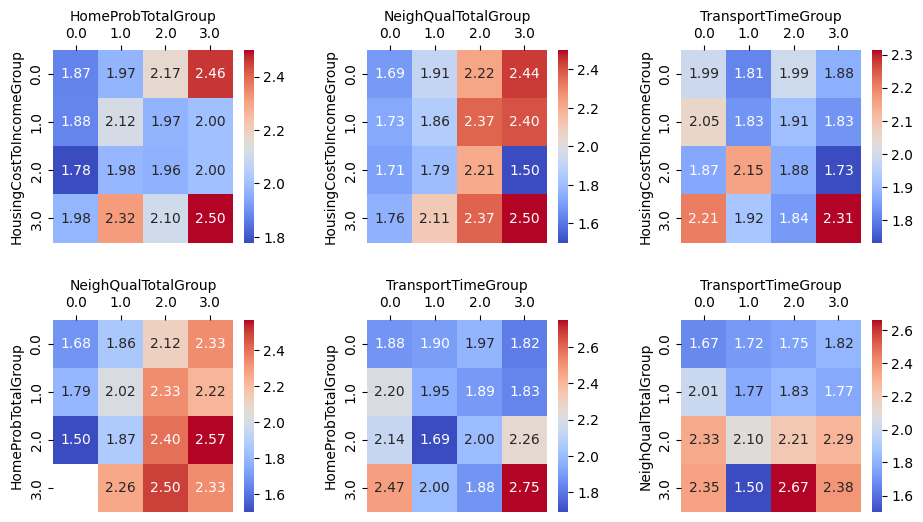

In [66]:
# plot heat map for 'HousingCostToIncomeGroup'、'HomeProbTotalGroup' 、 'NeighQualTotalGroup' 、'TransportTimeGroup' pairwise against 'Health'
# plot in one figure

fig, axes = plt.subplots(2, 3, figsize=(11, 6))
sns.heatmap(df.pivot_table(index='HousingCostToIncomeGroup', columns='HomeProbTotalGroup', values='Health', aggfunc='mean'), ax=axes[0, 0], annot=True,fmt='.2f', cmap='coolwarm')
sns.heatmap(df.pivot_table(index='HousingCostToIncomeGroup', columns='NeighQualTotalGroup', values='Health', aggfunc='mean'), ax=axes[0, 1],annot=True,fmt='.2f', cmap='coolwarm')
sns.heatmap(df.pivot_table(index='HousingCostToIncomeGroup', columns='TransportTimeGroup', values='Health', aggfunc='mean'), ax=axes[0, 2],annot=True,fmt='.2f', cmap='coolwarm')
sns.heatmap(df.pivot_table(index='HomeProbTotalGroup', columns='NeighQualTotalGroup', values='Health', aggfunc='mean'), ax=axes[1, 0],annot=True,fmt='.2f', cmap='coolwarm')
sns.heatmap(df.pivot_table(index='HomeProbTotalGroup', columns='TransportTimeGroup', values='Health', aggfunc='mean'), ax=axes[1, 1],annot=True, fmt='.2f', cmap='coolwarm')
sns.heatmap(df.pivot_table(index='NeighQualTotalGroup', columns='TransportTimeGroup', values='Health', aggfunc='mean'), ax=axes[1, 2],annot=True, fmt='.2f', cmap='coolwarm')
for i in range(2):
    for j in range(3):
        axes[i,j].xaxis.tick_top()
        axes[i,j].xaxis.set_label_position('top')
plt.subplots_adjust(hspace=0.4,wspace=0.4)


In [67]:
# 混合的低剥夺程度的样本，不一定健康状况最好
# 除了右下两个热力图，其他的热力图中，健康状况最好的，都不出现在剥夺程度最低的组合中

In [68]:
# HomeProb和NeighQual的相关性比较明显 0.242427
# NeighQual和Health的相关性也比较明显 0.241392

#### Co-correlation matrix

In [72]:
# calculate the correlation matrix
global df
corr = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup', 'Health']].corr()
# rename the columns of corr
corr.columns = ['HousingCost.', 'HomeProb', 'NeighQual', 'TransportTime', 'Health']
corr.index = ['HousingCost.', 'HomeProb', 'NeighQual', 'TransportTime', 'Health']

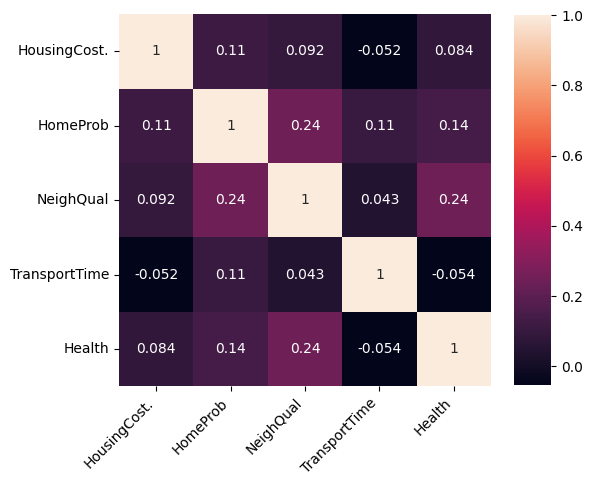

In [73]:
# plot map for correlation matrix
plt.figure(figsize=(6, 6))
ax = sns.heatmap(corr, annot=True, square=True, cbar_kws={'shrink': 0.8, 'aspect': 10})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


## Single Linear analysis

In [74]:
# perform ols regression for 'HousingCostToIncome' and 'Health' without constant
# using statsmodels.api
from statsmodels.formula.api import ols
model = ols('Health ~ 0 + HousingCostToIncomeGroup', data=df).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.395
Model:                            OLS   Adj. R-squared (uncentered):              0.394
Method:                 Least Squares   F-statistic:                              971.9
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                   1.11e-164
Time:                        01:25:49   Log-Likelihood:                         -2884.3
No. Observations:                1491   AIC:                                      5771.
Df Residuals:                    1490   BIC:                                      5776.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [75]:
model = ols('Health ~ 0 + HomeProbTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.440
Model:                            OLS   Adj. R-squared (uncentered):              0.439
Method:                 Least Squares   F-statistic:                              1169.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                   1.35e-189
Time:                        01:25:50   Log-Likelihood:                         -2827.0
No. Observations:                1491   AIC:                                      5656.
Df Residuals:                    1490   BIC:                                      5661.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [76]:
model = ols('Health ~ 0 + NeighQualTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                              3507.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                        0.00
Time:                        01:25:50   Log-Likelihood:                         -2356.6
No. Observations:                1491   AIC:                                      4715.
Df Residuals:                    1490   BIC:                                      4721.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [77]:
model = ols('Health ~ 0 + TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.264
Model:                            OLS   Adj. R-squared (uncentered):              0.263
Method:                 Least Squares   F-statistic:                              534.1
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                   3.01e-101
Time:                        01:25:50   Log-Likelihood:                         -3030.3
No. Observations:                1491   AIC:                                      6063.
Df Residuals:                    1490   BIC:                                      6068.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [80]:
model = ols('Health ~ 0 + Q("Housing&TransportGroup")', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.491
Model:                            OLS   Adj. R-squared (uncentered):              0.491
Method:                 Least Squares   F-statistic:                              1439.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                   6.59e-221
Time:                        01:27:53   Log-Likelihood:                         -2754.9
No. Observations:                1491   AIC:                                      5512.
Df Residuals:                    1490   BIC:                                      5517.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

## Multiple linear regression

In [63]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + HomeProbTotalGroup + NeighQualTotalGroup + TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              1098.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                        0.00
Time:                        00:47:49   Log-Likelihood:                         -2233.8
No. Observations:                1491   AIC:                                      4476.
Df Residuals:                    1487   BIC:                                      4497.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

### Interaction term

#### all+ two-two interactions

In [64]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + HomeProbTotalGroup + NeighQualTotalGroup + TransportTimeGroup + \
            HousingCostToIncomeGroup:HomeProbTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              971.7
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                        0.00
Time:                        00:47:53   Log-Likelihood:                         -2176.6
No. Observations:                1491   AIC:                                      4363.
Df Residuals:                    1486   BIC:                                      4390.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------

In [65]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + HomeProbTotalGroup + NeighQualTotalGroup + TransportTimeGroup + \
            HousingCostToIncomeGroup:NeighQualTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              1079.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                        0.00
Time:                        00:47:57   Log-Likelihood:                         -2116.1
No. Observations:                1491   AIC:                                      4242.
Df Residuals:                    1486   BIC:                                      4269.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------

In [66]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + HomeProbTotalGroup + NeighQualTotalGroup + TransportTimeGroup + \
            HousingCostToIncomeGroup:TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              921.4
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                        0.00
Time:                        00:48:00   Log-Likelihood:                         -2206.7
No. Observations:                1491   AIC:                                      4423.
Df Residuals:                    1486   BIC:                                      4450.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------

In [67]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + HomeProbTotalGroup + NeighQualTotalGroup + TransportTimeGroup + \
            HomeProbTotalGroup:NeighQualTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              1074.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                        0.00
Time:                        00:48:01   Log-Likelihood:                         -2118.6
No. Observations:                1491   AIC:                                      4247.
Df Residuals:                    1486   BIC:                                      4274.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [68]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + HomeProbTotalGroup + NeighQualTotalGroup + TransportTimeGroup + \
            HomeProbTotalGroup:TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              934.6
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                        0.00
Time:                        00:48:04   Log-Likelihood:                         -2198.7
No. Observations:                1491   AIC:                                      4407.
Df Residuals:                    1486   BIC:                                      4434.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [69]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + HomeProbTotalGroup + NeighQualTotalGroup + TransportTimeGroup + \
            NeighQualTotalGroup:TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.777
Model:                            OLS   Adj. R-squared (uncentered):              0.776
Method:                 Least Squares   F-statistic:                              1035.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                        0.00
Time:                        00:48:06   Log-Likelihood:                         -2140.5
No. Observations:                1491   AIC:                                      4291.
Df Residuals:                    1486   BIC:                                      4317.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

#### all+ four interactions

In [70]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + HomeProbTotalGroup + NeighQualTotalGroup + TransportTimeGroup + \
            HousingCostToIncomeGroup:HomeProbTotalGroup:NeighQualTotalGroup:TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              948.1
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                        0.00
Time:                        00:48:08   Log-Likelihood:                         -2190.6
No. Observations:                1491   AIC:                                      4391.
Df Residuals:                    1486   BIC:                                      4418.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                                                                         coef    std err          t     

## Logistic Regression


In [333]:
print(df['HousingCostToIncomeGroup'].isna().sum())

0


In [54]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [57]:
y = df['Health']
X = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']]

# 添加常数项
# X = sm.add_constant(X)

# 拟合模型
model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')

# 输出模型摘要
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.123408
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
                             OrderedModel Results                             
Dep. Variable:                 Health   Log-Likelihood:                -1675.0
Model:                   OrderedModel   AIC:                             3366.
Method:            Maximum Likelihood   BIC:                             3408.
Date:                Wed, 17 Jul 2024                                         
Time:                        23:41:46                                         
No. Observations:                1491                                         
Df Residuals:                    1483                                         
Df Model:                           4                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------

In [334]:
# Logistic regression results, the accuracy and F1 value of health value 2 classification are significantly higher than those of 5 classification

In [335]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import f1_score

df['Health'].fillna(df['Health'].median(), inplace=True) # 1个空值

# Define and fit a multi-class logistic regression model
multinomial_logit_model = sm.MNLogit(df['Health'], df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']])
multinomial_logit_result = multinomial_logit_model.fit()

# Print confusion matrix
print(multinomial_logit_result.pred_table())    

# Calculate accuracy
accuracy = np.diag(multinomial_logit_result.pred_table()).sum() / df.shape[0]
print('Accuracy:', accuracy)

# Calculate micro F1 and macro F1
y_true = df['Health']
y_pred = np.argmax(multinomial_logit_result.predict(), axis=1)
micro_f1 = f1_score(y_true, y_pred, average='micro')
macro_f1 = f1_score(y_true, y_pred, average='macro')
print('Micro F1:', micro_f1)
print('Macro F1:', macro_f1)


         Current function value: 1.237324
         Iterations: 35
[[ 57. 345.   0.   9.   0.]
 [ 65. 670.   0.  11.   0.]
 [ 15. 249.   0.   4.   0.]
 [  1.  60.   0.   0.   0.]
 [  0.   5.   0.   0.   0.]]
Accuracy: 0.4875922199865862
Micro F1: 0.2340710932260228
Macro F1: 0.07065816406865061


/Users/qinziwei/Projects/xianyu/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [336]:
# transfer Health into binary value with median

df['Health_bin'] = df['Health'].apply(lambda x: 1 if x > df['Health'].median() else 0)

In [337]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import f1_score

# Define and fit a multi-class logistic regression model
multinomial_logit_model = sm.MNLogit(df['Health_bin'], df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']])
multinomial_logit_result = multinomial_logit_model.fit()

# Print confusion matrix
print(multinomial_logit_result.pred_table())    

# Calculate accuracy
accuracy = np.diag(multinomial_logit_result.pred_table()).sum() / df.shape[0]
print('Accuracy:', accuracy)

# Calculate micro F1 and macro F1
y_true = df['Health_bin']
y_pred = np.argmax(multinomial_logit_result.predict(), axis=1)
micro_f1 = f1_score(y_true, y_pred, average='micro')
macro_f1 = f1_score(y_true, y_pred, average='macro')
print('Micro F1:', micro_f1)
print('Macro F1:', macro_f1)


Optimization terminated successfully.
         Current function value: 0.594953
         Iterations 5
[[1157.    0.]
 [ 334.    0.]]
Accuracy: 0.7759892689470155
Micro F1: 0.7759892689470155
Macro F1: 0.43693353474320246


## Threshold analysis

In [71]:
# calculate the number of deprivations 
df['DeprivationNum'] = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']].sum(axis=1)

In [72]:
# group the number of deprivations into 5 groups
df['DeprivationNumGroup'] = pd.cut(df['DeprivationNum'], bins=[-1, 2, 5, 100], labels=[0,1,2])
# df['DeprivationNumGroup'] = df['DeprivationNumGroup'].astype(float)
print(df['DeprivationNumGroup'].value_counts())

DeprivationNumGroup
1    689
0    486
2    316
Name: count, dtype: int64


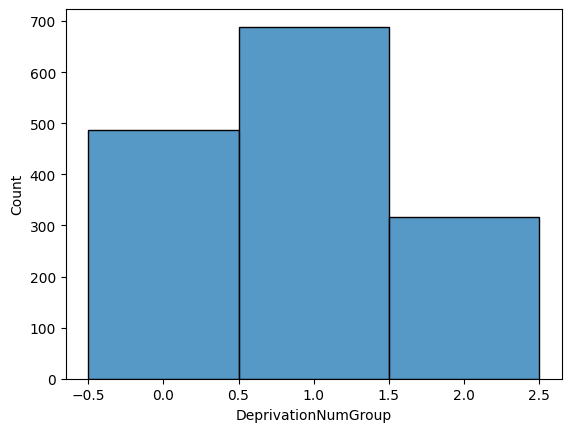

In [73]:
# plot for 'DeprivationNumGroup'
sns.histplot(df['DeprivationNumGroup'])
plt.show()

In [74]:
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
# compare health outcomes across these groups using ANOVA or Chi-square tests.
# ANOVA
model = ols('Health ~ 0 + DeprivationNumGroup', data=df).fit()
print(model.summary())
print()


                            OLS Regression Results                            
Dep. Variable:                 Health   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     12.37
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           4.72e-06
Time:                        00:49:01   Log-Likelihood:                -1781.3
No. Observations:                1491   AIC:                             3569.
Df Residuals:                    1488   BIC:                             3585.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
DeprivationNumGroup[0]     1

In [75]:
# ANOVA analysis
anova_results = anova_lm(model, typ=2)
print(anova_results)

                          sum_sq      df            F  PR(>F)
DeprivationNumGroup  5955.849314     3.0  3102.556459     0.0
Residual              952.150686  1488.0          NaN     NaN


In [6]:
import scipy.stats as stats

f_value, p_value = stats.f_oneway(df[df['DeprivationNumGroup']==0]['Health'], df[df['DeprivationNumGroup']==1]['Health'], df[df['DeprivationNumGroup']==2]['Health'])

print("F-value:", f_value)
print("P-value:", p_value)

NameError: name 'df' is not defined

In [77]:

# Chi-square tests
contingency_table = pd.crosstab(df['Health'], df['DeprivationNumGroup'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi-square:', chi2)
print('P-value:', p)

Chi-square: 26.666444881939043
P-value: 0.0008070900445782014


In [78]:
# ANOVA和卡方检验的P值都小于0.05，说明不同剥夺程度组的健康值有显著差异